In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/RAJ BATHANI/Downloads/TimeSeries Datasets/AMGN_close.csv", index_col = ['Date'], parse_dates = ['Date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2013-01-02 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [5]:
df.head(10)

,Close
Date,
2013-01-02,89.150002
2013-01-03,88.589996
2013-01-04,88.980003
2013-01-07,88.529999
2013-01-08,88.150002
2013-01-09,88.669998
2013-01-10,87.809998
2013-01-11,86.959999
2013-01-14,86.919998


In [7]:
df.tail()

,Close
Date,
2019-12-24,242.330002
2019-12-26,241.899994
2019-12-27,241.529999
2019-12-30,240.270004
2019-12-31,241.070000


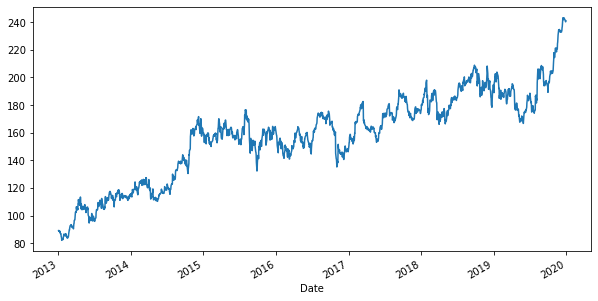

In [6]:
df['Close'].plot(figsize = (10,5), label = 'Close')

In [23]:
#Dickey-Fuller

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(df['Close'])

(-1.1740895405674705,
 0.684641266127672,
 0,
 1761,
 {'1%': -3.434068828903083,
  '5%': -2.8631826560063542,
  '10%': -2.5676445003500348},
 7911.877141254449)

In [27]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [28]:
adf_test(df['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.174090
p-value                    0.684641
# lags used                0.000000
# observations          1761.000000
critical value (1%)       -3.434069
critical value (5%)       -2.863183
critical value (10%)      -2.567645
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [29]:
#Stationary by plotting graph

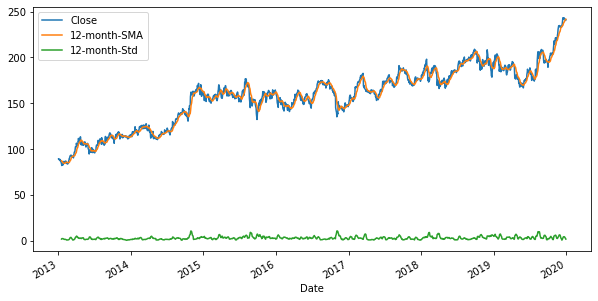

In [32]:
df['12-month-SMA'] = df['Close'].rolling(window=12).mean()
df['12-month-Std'] = df['Close'].rolling(window=12).std()

df[['Close','12-month-SMA','12-month-Std']].plot(figsize = (10,5));

In [33]:
#ACF and PACF

In [34]:
import statsmodels.api as sm

In [35]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [36]:
from pandas.plotting import lag_plot

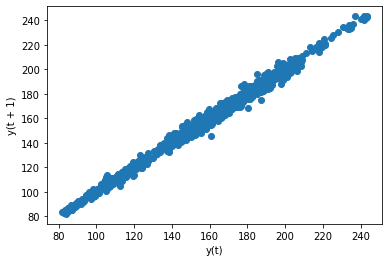

In [37]:
lag_plot(df['Close'])

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

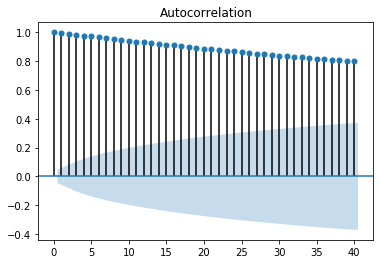

In [44]:
plot_acf(df['Close'],lags=40);

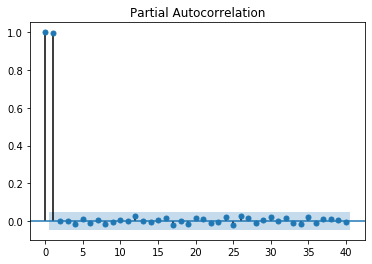

In [46]:
plot_pacf(df['Close'], lags = 40);

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2013-01-02 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [9]:
df = df.asfreq('b')

In [12]:
df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=1825, freq='B')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2019-12-31
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [32]:
df.head()

,Close
Date,
2013-01-02,89.150002
2013-01-03,88.589996
2013-01-04,88.980003
2013-01-07,88.529999
2013-01-08,88.150002


In [33]:
df.isna()

,Close
Date,
2013-01-02,False
2013-01-03,False
2013-01-04,False
2013-01-07,False
2013-01-08,False
...,...
2019-12-25,True
2019-12-26,False
2019-12-27,False


In [34]:
df.head(10)

,Close
Date,
2013-01-02,89.150002
2013-01-03,88.589996
2013-01-04,88.980003
2013-01-07,88.529999
2013-01-08,88.150002
2013-01-09,88.669998
2013-01-10,87.809998
2013-01-11,86.959999
2013-01-14,86.919998


In [14]:
df.isna().sum()

Close    63
dtype: int64

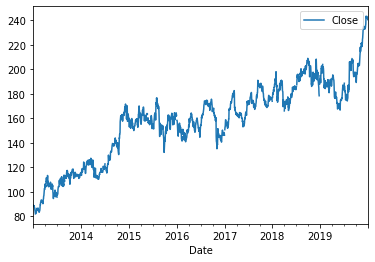

In [36]:
df.plot()

In [16]:
df.Close = df.Close.fillna(method = "ffill")

In [17]:
df.isna().sum()

Close    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2019-12-31
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [40]:
df.Date = pd.to_datetime(df.Date, dayfirst = True)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [41]:
df.head(20)

,Close
Date,
2013-01-02,89.150002
2013-01-03,88.589996
2013-01-04,88.980003
2013-01-07,88.529999
2013-01-08,88.150002
2013-01-09,88.669998
2013-01-10,87.809998
2013-01-11,86.959999
2013-01-14,86.919998


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2013-01-02 to 2019-12-31
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [45]:
df.isna().count

<bound method DataFrame.count of             Close
Date             
2013-01-02  False
2013-01-03  False
2013-01-04  False
2013-01-07  False
2013-01-08  False
...           ...
2019-12-25  False
2019-12-26  False
2019-12-27  False
2019-12-30  False
2019-12-31  False

[1825 rows x 1 columns]>

In [18]:
df.isna().sum()

Close    0
dtype: int64

In [125]:
len(test1)

7

In [120]:
predict

[242.8055226191641]

In [114]:
ARwalk.k_ar

25

In [115]:
len(data)

1819

In [116]:
len(train1)

1818